# Chapter 2 年金数理

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display
from scipy import optimize
np.random.seed(0)
sns.set()

### 脱退率と給与指数

In [12]:
medians=np.array([22,27,32,37,42,47,52,57])
enroll_count=np.array([138,67,165,154,145,135,143,152])
withdrawal_count=np.array([9,2,6,3,2,2,2,1])
salary_sample_count=np.array([85,87,96,103,125,138,120,145])
salary_mean=np.array([23.2,26.8,32.7,42.5,46.8,47.5,47.8,47.5])

df=pd.DataFrame({
    "AgeMedian":medians,
    "EnrollCount":enroll_count,
    "WithdrawalCount":withdrawal_count,
    "SalarySampleCount":salary_sample_count,
    "SalaryMean":salary_mean
})
df

,AgeMedian,EnrollCount,WithdrawalCount,SalarySampleCount,SalaryMean
0,22,138,9,85,23.2
1,27,67,2,87,26.8
2,32,165,6,96,32.7
3,37,154,3,103,42.5
4,42,145,2,125,46.8
5,47,135,2,138,47.5
6,52,143,2,120,47.8
7,57,152,1,145,47.5


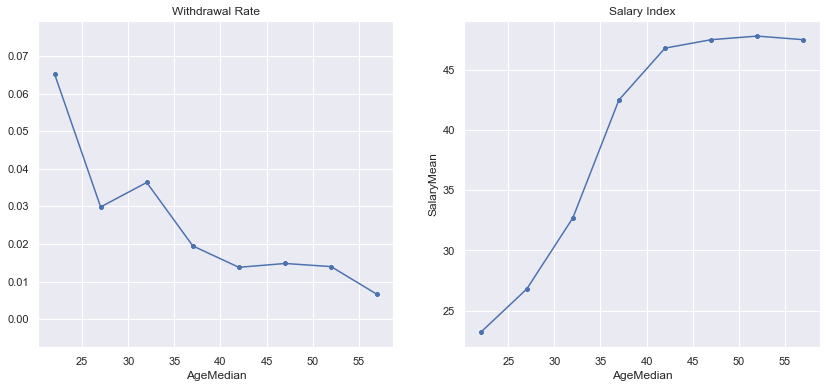

In [13]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.scatterplot(x=df["AgeMedian"],y=df["WithdrawalCount"]/df["EnrollCount"])
sns.lineplot(x=df["AgeMedian"],y=df["WithdrawalCount"]/df["EnrollCount"])
plt.title("Withdrawal Rate")
plt.subplot(1,2,2)
sns.scatterplot(x=df["AgeMedian"],y=df["SalaryMean"])
sns.lineplot(x=df["AgeMedian"],y=df["SalaryMean"])
plt.title("Salary Index")
plt.show()

Withdrawal Rate Regression Params: [ 1.54755760e-01 -5.59413618e-03  5.39303961e-05]
Salary Mean Regression Params [lm]: [8.89738095 0.77095238]
Salary Mean Regression Params [lm]: [-3.11146190e+01  2.98295238e+00 -2.80000000e-02]


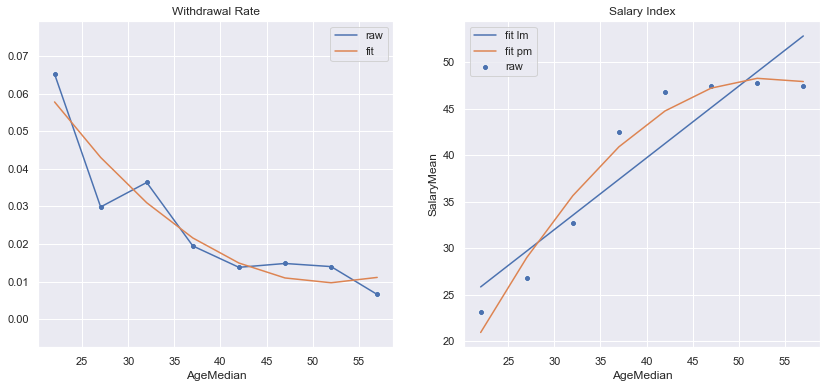

In [29]:
polynomial_model=lambda x,a,b,c: a+b*x+c*(x**2)
linear_model=lambda x,a,b: a+b*x

params_estim,params_cov=optimize.curve_fit(polynomial_model,xdata=medians,ydata=withdrawal_count/enroll_count)
fitted_withdrawal_rate=polynomial_model(x=medians,a=params_estim[0],b=params_estim[1],c=params_estim[2])
print("Withdrawal Rate Regression Params:",params_estim)


params_estim,params_cov=optimize.curve_fit(linear_model,xdata=medians,ydata=salary_mean)
fitted_salary_mean_lm=linear_model(x=medians,a=params_estim[0],b=params_estim[1])
print("Salary Mean Regression Params [lm]:",params_estim)

params_estim,params_cov=optimize.curve_fit(polynomial_model,xdata=medians,ydata=salary_mean)
fitted_salary_mean_pm=polynomial_model(x=medians,a=params_estim[0],b=params_estim[1],c=params_estim[2])
print("Salary Mean Regression Params [lm]:",params_estim)

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.scatterplot(x=df["AgeMedian"],y=df["WithdrawalCount"]/df["EnrollCount"])
sns.lineplot(x=df["AgeMedian"],y=df["WithdrawalCount"]/df["EnrollCount"],label="raw")
sns.lineplot(x=medians,y=fitted_withdrawal_rate,label="fit")
plt.title("Withdrawal Rate");plt.legend()
plt.subplot(1,2,2)
sns.scatterplot(x=df["AgeMedian"],y=df["SalaryMean"],label="raw")
sns.lineplot(x=df["AgeMedian"],y=fitted_salary_mean_lm,label="fit lm")
sns.lineplot(x=df["AgeMedian"],y=fitted_salary_mean_pm,label="fit pm")
plt.title("Salary Index");plt.legend()
plt.show()

In [34]:
q=pd.read_table("../chap1/shibouritu07M.txt",encoding="shift-jis")

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


,年齢,死亡率
0,0,0.00108
1,1,0.00075
2,2,0.00049
3,3,0.00031
4,4,0.00021
5,5,0.00017
6,6,0.00016
7,7,0.00016
8,8,0.00016
9,9,0.00015
